# NOT READY FOR FEEDBACK
<span style="color:red"> Still working on formatting my data for analysis. No analysis ready. </span>

Data analysis.

Use summary functions like mean and standard deviation along with visual displays like scatterplots and histograms to describe data.

Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.
Evaluation of significance. Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

Interpretation and conclusions. 
What did you find over the course of your data analysis, and how confident are you in these conclusions? Detail your results more than you did in the introduction, now that the reader is familiar with your methods and analysis. Interpret these results in the wider context of the real-life application from where your data hails.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

from   scipy.optimize import curve_fit
from   sklearn.linear_model import LinearRegression


%matplotlib inline

# State Level Covid, Vaccinations, and Mobility data

In [2]:
state_df = pd.read_csv('Project_Data')
state_df.date = pd.to_datetime(state_df.date)

In [3]:
state_df['trips_log'] = state_df.trips.apply(lambda x: np.log(x))
state_df['new_case_log'] = state_df.new_case.apply(lambda x: np.log(x))
state_df['new_death_log'] = state_df.new_death.apply(lambda x: np.log(x))
state_df['series_complete_yes_log'] = state_df.series_complete_yes	.apply(lambda x: np.log(x))
state_df['death_rate'] = state_df['tot_death'] / state_df['tot_cases']

In [4]:
state_df.sample(5)

date state  pop_stay_at_home  pop_not_stay_at_home       trips  \
19176 2020-01-12    MS          570293.0             2416237.0   8300667.0   
51298 2021-10-21    CA               NaN                   NaN         NaN   
34018 2020-10-29    AL          987961.0             3899910.0  13582702.0   
4776  2019-04-04    NC         1716571.0             8635310.0  48699192.0   
14525 2019-10-12    SD          179641.0              699894.0   3381753.0   

       trips_500  trips_1_50  trips_50_500  tot_cases  new_case  tot_death  \
19176     3579.0   8021046.0      276042.0        NaN       NaN        NaN   
51298        NaN         NaN           NaN  4820020.0    8407.0    70741.0   
34018     3392.0  13090700.0      488610.0   188671.0    1310.0     4544.0   
4776     36622.0  47765294.0      897276.0        NaN       NaN        NaN   
14525     2744.0   3257502.0      121507.0        NaN       NaN        NaN   

       new_death  administered  series_complete_yes  trips_log  new_case_log  \
19176        NaN           NaN                  NaN  15.931846           NaN   
51298      148.0    52869188.0           23923585.0        NaN      9.036820   
34018       26.0           NaN                  NaN  16.424308      7.177782   
4776         NaN           NaN                  NaN  17.701173           NaN   
14525        NaN           NaN                  NaN  15.033905           NaN   

       new_death_log  series_complete_yes_log  death_rate  
19176            NaN                      NaN         NaN  
51298       4.997212                16.990375    0.014676  
34018       3.258097                      NaN    0.024084  
4776             NaN                      NaN         NaN  
14525            NaN                      NaN         NaN

## Here's the last 10 instances (days) for a random state

In [5]:
state_df[state_df.state == state_df.sample().state.iat[0]].tail(10)

date state  pop_stay_at_home  pop_not_stay_at_home  trips  \
52993 2021-10-30    LA               NaN                   NaN    NaN   
53009 2021-10-01    LA               NaN                   NaN    NaN   
53018 2021-09-30    LA               NaN                   NaN    NaN   
53036 2021-09-08    LA               NaN                   NaN    NaN   
53040 2021-10-26    LA               NaN                   NaN    NaN   
53042 2021-10-20    LA               NaN                   NaN    NaN   
53054 2021-09-14    LA               NaN                   NaN    NaN   
53055 2021-10-12    LA               NaN                   NaN    NaN   
53056 2021-09-28    LA               NaN                   NaN    NaN   
53057 2021-10-08    LA               NaN                   NaN    NaN   

       trips_500  trips_1_50  trips_50_500  tot_cases  new_case  tot_death  \
52993        NaN         NaN           NaN   758471.0       0.0    14547.0   
53009        NaN         NaN           NaN   741906.0    1373.0    13988.0   
53018        NaN         NaN           NaN   740533.0     872.0    13949.0   
53036        NaN         NaN           NaN   705498.0    3066.0    12915.0   
53040        NaN         NaN           NaN   756969.0     460.0    14496.0   
53042        NaN         NaN           NaN   754027.0     495.0    14424.0   
53054        NaN         NaN           NaN   719424.0    2200.0    13241.0   
53055        NaN         NaN           NaN   749922.0    1129.0    14238.0   
53056        NaN         NaN           NaN   738613.0    1031.0    13850.0   
53057        NaN         NaN           NaN   747329.0     787.0    14173.0   

       new_death  administered  series_complete_yes  trips_log  new_case_log  \
52993        0.0     4866322.0            2215113.0        NaN          -inf   
53009       39.0     4533166.0            2115775.0        NaN      7.224753   
53018       49.0     4518953.0            2111741.0        NaN      6.770789   
53036      136.0     4289035.0            1980577.0        NaN      8.028129   
53040       16.0     4801994.0            2203150.0        NaN      6.131226   
53042       36.0     4747194.0            2178638.0        NaN      6.204558   
53054      121.0     4351623.0            2019965.0        NaN      7.696213   
53055       34.0     4661783.0            2152204.0        NaN      7.029088   
53056       54.0     4493604.0            2103718.0        NaN      6.938284   
53057       34.0     4623927.0            2141368.0        NaN      6.668228   

       new_death_log  series_complete_yes_log  death_rate  
52993           -inf                14.610814    0.019179  
53009       3.663562                14.564932    0.018854  
53018       3.891820                14.563023    0.018836  
53036       4.912655                14.498899    0.018306  
53040       2.772589                14.605399    0.019150  
53042       3.583519                14.594210    0.019129  
53054       4.795791                14.518591    0.018405  
53055       3.526361                14.582003    0.018986  
53056       3.988984                14.559217    0.018751  
53057       3.526361                14.576955    0.018965

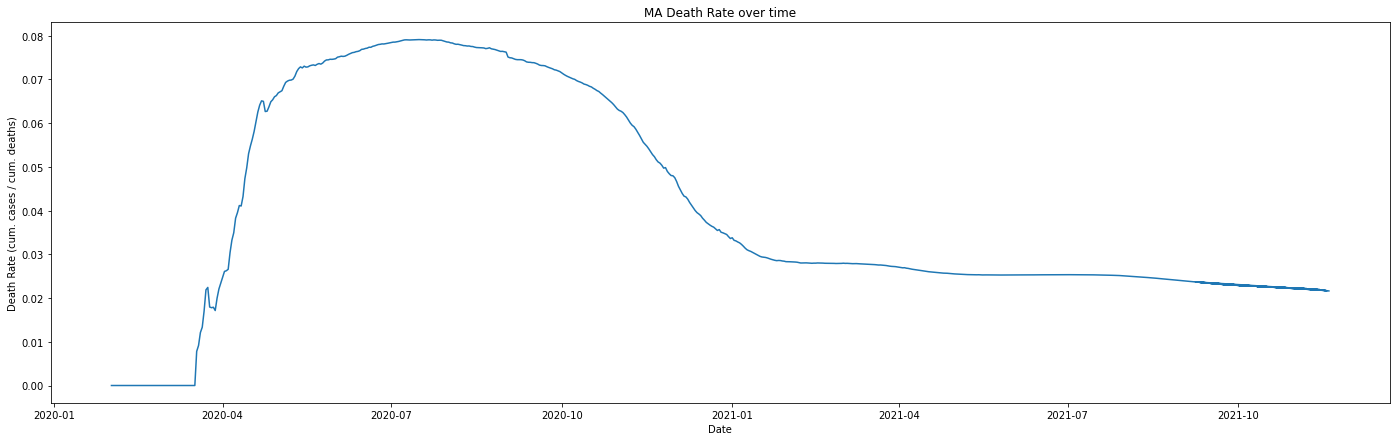

In [6]:
temp_df = state_df[state_df['state'] == 'MA']
temp_df[temp_df['death_rate'] != np.inf]


plt.figure(figsize=(24,7))
plt.plot(
    temp_df[pd.notnull(temp_df['death_rate'])].date,
    temp_df[pd.notnull(temp_df['death_rate'])].death_rate,
)
plt.xlabel('Date')
plt.ylabel('Death Rate (cum. cases / cum. deaths)')
plt.title('MA Death Rate over time')
plt.show()

# County Level Covid and Internet Data Analysis

In [7]:
og_county_covid_df = pd.read_csv('/Users/josephgreene/Library/CloudStorage/Box-Box/project_county_covid_data')
og_county_internet_df = pd.read_csv('project_county_internet_data')

In [8]:
county_covid_df = og_county_covid_df.copy()
county_internet_df = og_county_internet_df.copy()

In [9]:
county_covid_df['date'] = pd.to_datetime(county_covid_df['date'])
county_covid_df.drop(columns='Unnamed: 0',inplace=True)
current_covid = county_covid_df.groupby(by='fips_code').max()
current_covid['death_rate'] = current_covid['tot_deaths'] / current_covid['tot_cases']
current_covid.drop(columns=['cases','cases_avg','cases_avg_per_100k','deaths','deaths_avg','deaths_avg_per_100k'],inplace=True)

In [10]:
county_internet_df.drop(columns='Unnamed: 0', inplace=True)

In [47]:
# county_df is the most recent Covid data merged with internet data by county

county_df = pd.merge(current_covid,county_internet_df,on='fips_code',how='left')
print(county_df.shape)
county_df.head()

(3273, 16)


fips_code       date   county    state  tot_deaths  tot_cases  death_rate  \
0       1001 2021-11-17  Autauga  Alabama         155      10423    0.014871   
1       1003 2021-11-17  Baldwin  Alabama         779      44672    0.017438   
2       1005 2021-11-17  Barbour  Alabama         128       6538    0.019578   
3       1007 2021-11-17     Bibb  Alabama         733      30266    0.024219   
4       1009 2021-11-17   Blount  Alabama         460      34692    0.013260   

    County    State           Zip  AllProviderCount_2020  All25_3_2020  \
0  Autauga  Alabama  36147.571429               9.714286      5.285714   
1      NaN      NaN           NaN                    NaN           NaN   
2  Barbour  Alabama  36085.000000               9.400000      5.000000   
3     Bibb  Alabama  35581.142857               9.000000      4.000000   
4      NaN      NaN           NaN                    NaN           NaN   

   All100_3    TestCount  AverageMbps  FastestAverageMbps  
0  3.571429  3381.166667    38.218333           76.748333  
1       NaN          NaN          NaN                 NaN  
2  2.000000   113.666667    52.206667          113.016667  
3  3.000000   226.714286    23.557143           60.075714  
4       NaN          NaN          NaN                 NaN

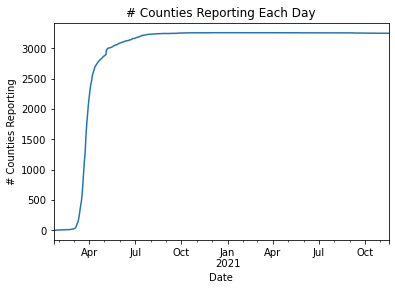

In [48]:
county_covid_df.groupby('date').size().plot()
plt.ylabel('# Counties Reporting')
plt.xlabel('Date')
plt.title("# Counties Reporting each day".title())
plt.show()

In [49]:
def merge_internet(df):
    df2 = pd.merge(df,county_internet_df,on='fips_code',how='inner')
    df2['death_rate'] = df2['tot_deaths'] / df2['tot_cases']
    df2.drop(columns=['cases','cases_avg','cases_avg_per_100k','deaths','deaths_avg','deaths_avg_per_100k'],inplace=True)
    return df2

In [50]:
print("Most recent Covid Data")
county_df.drop(columns=['fips_code','Zip']).corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None,
    vmin=-0.8, 
    vmax=0.8
)

Most recent Covid Data


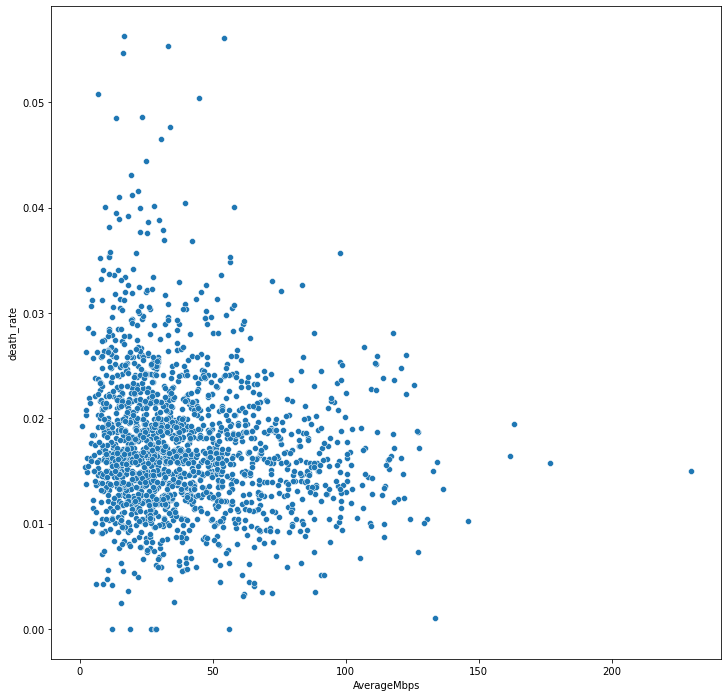

In [51]:
fig, plot = plt.subplots()
plot = sns.scatterplot(
    x='AverageMbps',
    y='death_rate',
    data=county_df,
)

fig.set_size_inches(12,12)
# rplt.figure(figsize=(12,12))
plt.show()

## Now looking only at March through June of 2020

In [52]:
# method from https://www.kite.com/python/answers/how-to-filter-pandas-dataframe-rows-by-date-in-python

start_date = "2020-09-01"
end_date = "2020-12-30"


after_start_date = county_covid_df["date"] >= start_date
before_end_date = county_covid_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = county_covid_df.loc[between_two_dates]

In [53]:
temp_df = merge_internet(county_covid_df.loc[between_two_dates])
temp_df = temp_df.dropna(subset=['AverageMbps','death_rate'])

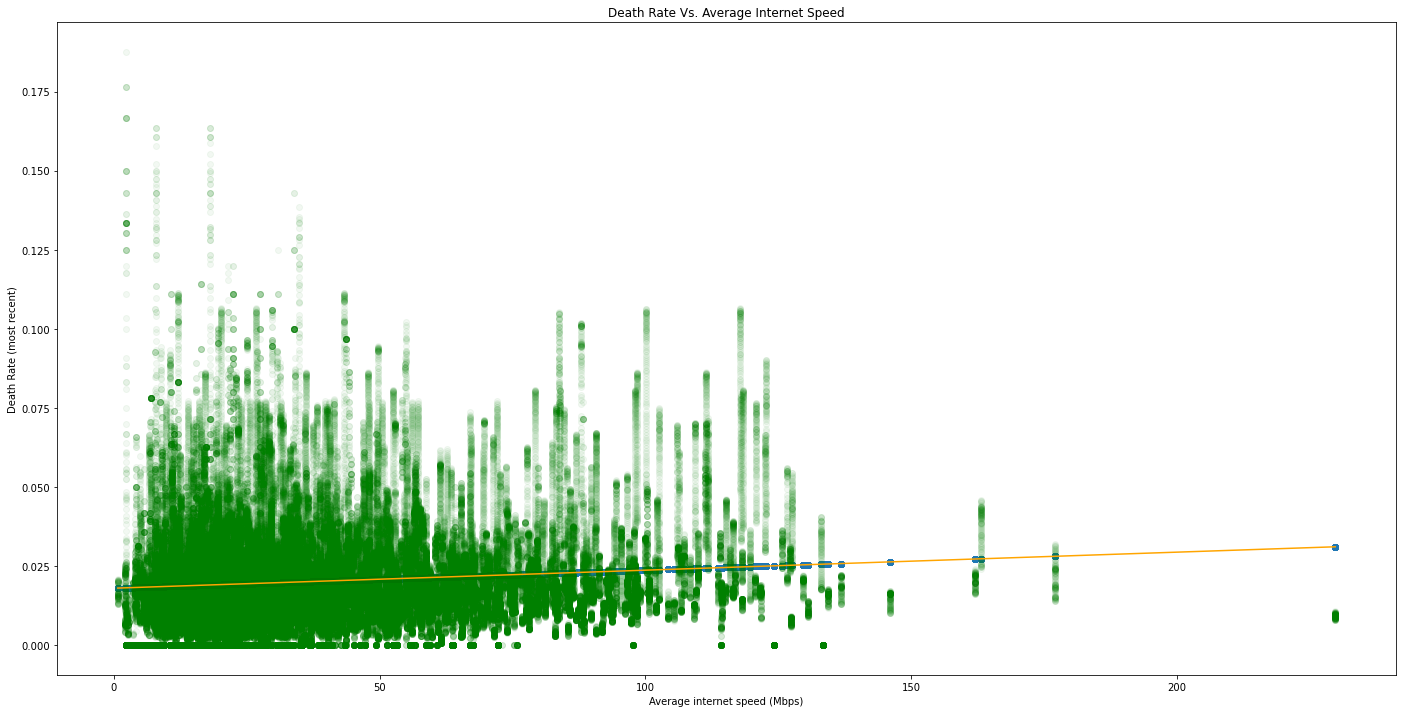

In [54]:
fig, plot = plt.subplots()
# plot = sns.scatterplot(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
#     alpha=.08
# )

model = LinearRegression()
model.fit(
    temp_df[['AverageMbps']],
    temp_df['death_rate']
)

sorted_temp_df = temp_df.sort_values('AverageMbps')
y_pred = model.predict(sorted_temp_df[['AverageMbps']])

m = model.coef_[0]    # slope
b = model.intercept_  # intercept

y_pred_hand = m * sorted_temp_df['AverageMbps'] + b



plot = plt.scatter(sorted_temp_df.AverageMbps, y_pred)

plt.plot(sorted_temp_df.AverageMbps, y_pred_hand, c='orange')
plt.scatter(temp_df.AverageMbps,temp_df.death_rate, c='green',alpha=.05)
# plot = sns.regression(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
# #     alpha=.08
# )

fig.set_size_inches(24,12)
plt.xlabel('Average internet speed (Mbps)')
plt.ylabel('Death Rate (most recent)')
plt.title('Death rate vs. average internet speed'.title())
plt.show()

In [55]:
# sns.regplot(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
# # #     alpha=.08
# )

In [56]:
temp_df[['death_rate','AverageMbps']].cov()

death_rate  AverageMbps
death_rate     0.000244     0.042934
AverageMbps    0.042934   753.071829

In [57]:
m

5.701216332136916e-05

### Death rate for the entire pandemic may not be a good measure

In [58]:
temp_df.corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None,
    vmin=-0.8, 
    vmax=0.8
)

In [59]:
county_covid_df.date.unique

<bound method Series.unique of 0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
1933537   2021-11-17
1933538   2021-11-17
1933539   2021-11-17
1933540   2021-11-17
1933541   2021-11-17
Name: date, Length: 1933542, dtype: datetime64[ns]>

---

In [60]:
df.sample(10)

NameError: name 'df' is not defined

In [61]:
sub_df = temp_df.loc[temp_df['state'] == 'NY']
sub_df['trips_log'] = sub_df.trips.apply(lambda x: np.log(x))
sub_df['new_case_log'] = sub_df.new_case.apply(lambda x: np.log(x))
sub_df['new_death_log'] = sub_df.new_death.apply(lambda x: np.log(x))
sub_df['series_complete_yes_log'] = sub_df.series_complete_yes	.apply(lambda x: np.log(x))

AttributeError: 'DataFrame' object has no attribute 'trips'

In [ ]:
sub_df.sample(10)

In [ ]:
distances = [
    'trips',
    'trips_1_50', 
    'trips_50_500', 
    'trips_500'
]
distances_log = []


for distance in distances:
    label = str(distance+'_log')
    sub_df[label] = sub_df[distance].apply(lambda x: np.log(x))
    distances_log.append(label)

In [ ]:
sub_df[distances+['new_death','new_case']].corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None, 
#     vmin=-0.8, 
#     vmax=0.8
)

In [50]:
# creates melted df with log trips by distance
melted_sub = sub_df.melt(
    value_vars=distances_log,
    var_name='Distance',
    id_vars=['date','new_death_log','new_case_log']   
)

KeyError: 'trips'

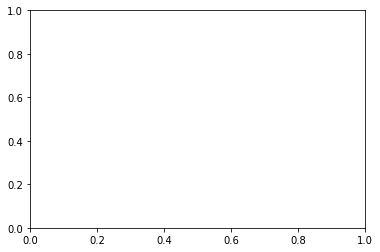

In [51]:
# melted_sub.groupby(by='Distance').size()

# melted_sub.shape
# plt.plot(melted_sub['value'],melted_sub['date'])#,'value',data=melted_sub.loc[melted_sub.Distance == 'trips'])
# plt.xlim(
    
# )
fig, ax = plt.subplots()
sns.lineplot(
    x=sub_df['date'],
    y=sub_df['trips'],
)
plt.xlim( 
    (date(2020, 3, 1), 
     date(2020, 5, 31))
)

fig.set_size_inches(24,8)
plt.show()

In [54]:
fig, ax = plt.subplots()
# ax = plt.plot(
#     sub_df.date,
#     sub_df.new_death_log.rolling(7, center=True).mean(), color='crimson', linewidth=3
# )
# ax2 = plt.twinx()
# ax2.plot(
#     sub_df.date,
#     sub_df.new_death_log.rolling(7, center=True).mean(), color='blue', linewidth=3
# )
sns.lineplot(
    x='date',
    y='value',
    hue='Distance', 
    data=melted_sub
)
# sns.lineplot(x='date',y='Distance')
fig.set_size_inches(24,8)
# plt.figure(figsize=(24,8))

plt.show()

In [53]:
sub_df.sort_values(by='date',inplace=True)
fig, ax = plt.subplots()
ax = plt.plot(
    sub_df.date,
    sub_df.new_case.rolling(7, center=True).mean(), color='crimson', linewidth=3
)

ax2 = plt.twinx()
ax2.plot(
    sub_df.date,
    sub_df.series_complete_yes, #.rolling(7, center=True).mean(),
    color='blue', linewidth=3
)

ax3 = plt.twinx()
ax3.plot(
    sub_df.date,
    sub_df.trips.rolling(7, center=True).mean(),
    color='green', linewidth=3
)

ax4 = plt.twinx()
ax4.plot(
    sub_df.date,
    sub_df.administered,
    color='green', linewidth=3
)


fig.set_size_inches(24,8)
plt.show()

In [ ]:
sub_df.sort_values(by='date',inplace=True)
fig, ax = plt.subplots()
ax = plt.plot(
    sub_df.date,
    sub_df.new_case.rolling(7, center=True).mean(), color='crimson', linewidth=3
)

ax2 = plt.twinx()
ax2.plot(
    sub_df.date,
    sub_df.series_complete_yes, #.rolling(7, center=True).mean(),
    color='blue', linewidth=3
)

ax3 = plt.twinx()
ax3.plot(
    sub_df.date,
    sub_df.trips.rolling(7, center=True).mean(),
    color='green', linewidth=3
)

ax4 = plt.twinx()
ax4.plot(
    sub_df.date,
    sub_df.administered,
    color='green', linewidth=3
)

ax5 = plt.twinx()
ax5.plot(
    sub_df.date,
    sub_df.death_rate

)

fig.set_size_inches(24,8)
plt.show()

In [ ]:
fig.axes

In [55]:
temp_df = sub_df.loc[pd.notnull(sub_df['new_case']) & pd.notnull(sub_df['trips'])]


# sns.set_style('ticks')

case_trips_model = LinearRegression()
case_trips_model.fit(temp_df[[ 'new_case' ]], temp_df['trips'])

y_pred = case_trips_model.predict(temp_df[['new_case']])

m = case_trips_model.coef_[0]    # slope
b = case_trips_model.intercept_  # intercept

y_pred_hand = m * temp_df['new_case']


# plot = sns.regplot(
#     y=sub_df.new_case,
#     x=sub_df.trips_log
# )
# plot.figure.set_size_inches(12,12)
temp_df.sort_values(by='trips',inplace=True)

plt.plot(
    temp_df['trips'],
    y_pred_hand
)

# # plt(figsize=(24,3))
# # .figure(figsize=(24,8))
# plt.show()


KeyError: 'new_case'

In [56]:

sns.lineplot(
    x=sub_df.date,
    y=sub_df[[
#     'date',
    'trips',
    'trips_1', 
    'trips_1_3', 
    'trips_3_5', 
    'trips_5_10',
    'trips_10_25',
    'trips_25_50', 
    'trips_50_100', 
    'trips_100_250', 
    'trips_250_500',
    'trips_500'
]],
    hue=sub_df[[
#     'date',
    'trips',
    'trips_1', 
    'trips_1_3', 
    'trips_3_5', 
    'trips_5_10',
    'trips_10_25',
    'trips_25_50', 
    'trips_50_100', 
    'trips_100_250', 
    'trips_250_500',
    'trips_500'
    ]],
)

KeyError: "None of [Index(['trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',\n       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250',\n       'trips_250_500', 'trips_500'],\n      dtype='object')] are in the [columns]"

In [ ]:
values = sub_df[[
    'trips',
    'trips_1',
    'trips_1_3',
    'trips_3_5',
    'trips_5_10',
    'trips_10_25',
    'trips_25_50',
    'trips_50_100',
    'trips_100_250',
    'trips_250_500',
    'trips_500']]
pd.melt(sub_df[['date']],values)

In [ ]:
sub_df

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(
    sub_df.new_death,
    sub_df.trips
    
)
plt.xlabel('new_deaths')
plt.ylabel('trips')
plt.show()

In [ ]:
ma_non_nan_trips = state_data1_dict["MA"].copy().loc[pd.notnull(state_data1_dict['MA'].trips)] 
temp_x = np.arange(len(ma_non_nan_trips.index))

# define custom function to fit
def quadratic(X, a, b, c):
    '''Second-order polynomial function'''
    return a*X**5 + b*X + c


# fit function parameters
quad_opt, quad_cov = curve_fit(quadratic, temp_x, ma_non_nan_trips.trips)

# plot results
ma_trips_scatter = sns.scatterplot(
    x=temp_x,
    y=ma_non_nan_trips.trips
)
plt.plot(temp_x, quadratic(temp_x, *quad_opt), c='orange', alpha=0.5) # predicted data

# plt.xlabel('Mean age (years)')
# plt.ylabel('Population change (%)')
plt.tight_layout()
plt.show()

In [ ]:
model = np.polynomial.Polynomial.fit(
    temp_x,
    ma_non_nan_trips.trips,
    3)

# plot output
sns.scatterplot(data=ma_non_nan_trips, x=temp_x, y='trips')
# trips = auto_df['horsepower'].sort_values()
plt.plot(temp_x, model(temp_x), c='orange')
plt.show()

In [ ]:
r2s = []
for i in range (0,30):
    model = np.polynomial.Polynomial.fit(
        temp_x,
        ma_non_nan_trips.trips,
        i)
    
    r2 = np.corrcoef(model(temp_x), ma_non_nan_trips['trips'])[0, 1]
    
    r2s.append(r2)


plt.plot(range(30),r2s)
plt.xticks(range(30))
plt.grid()
plt.show()
r2s

In [ ]:
r2chngs = []

for i in range(len(r2s)):
#     print(i)
    r2chng = r2s[i]-r2s[i-1]
    r2chngs.append(r2chng)

plt.plot(range(30),r2chngs)
plt.xticks(range(30))
plt.grid()
plt.show()
r2s

-----
## County mapping

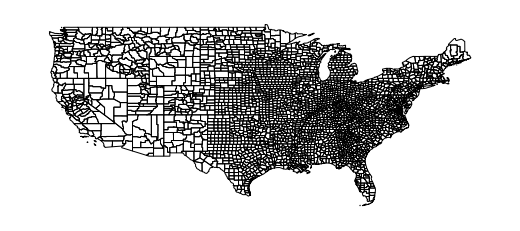

In [62]:
# Instructions from https://www.python-graph-gallery.com/choropleth-map-geopandas-python

# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt
from bokeh.models import LinearColorMapper
from bokeh.palettes import brewer
import mapclassify as mc

# Load the json file with county coordinates
geoData = gpd.read_file('US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]
geoData.rename(columns={'id':'fips_code'}, inplace=True)

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

In [63]:
county_df

fips_code       date      county           state  tot_deaths  tot_cases  \
0          1001 2021-11-17     Autauga         Alabama         155      10423   
1          1003 2021-11-17     Baldwin         Alabama         779      44672   
2          1005 2021-11-17     Barbour         Alabama         128       6538   
3          1007 2021-11-17        Bibb         Alabama         733      30266   
4          1009 2021-11-17      Blount         Alabama         460      34692   
...         ...        ...         ...             ...         ...        ...   
3268      72999 2021-11-17     Unknown     Puerto Rico       14438     263433   
3269      78010 2021-11-17   St. Croix  Virgin Islands         122      18234   
3270      78020 2021-11-17    St. John  Virgin Islands           3        337   
3271      78030 2021-11-17  St. Thomas  Virgin Islands          46       3668   
3272      78999 2021-09-18     Unknown  Virgin Islands       14422     262942   

      death_rate   County    State           Zip  AllProviderCount_2020  \
0       0.014871  Autauga  Alabama  36147.571429               9.714286   
1       0.017438      NaN      NaN           NaN                    NaN   
2       0.019578  Barbour  Alabama  36085.000000               9.400000   
3       0.024219     Bibb  Alabama  35581.142857               9.000000   
4       0.013260      NaN      NaN           NaN                    NaN   
...          ...      ...      ...           ...                    ...   
3268    0.054807      NaN      NaN           NaN                    NaN   
3269    0.006691      NaN      NaN           NaN                    NaN   
3270    0.008902      NaN      NaN           NaN                    NaN   
3271    0.012541      NaN      NaN           NaN                    NaN   
3272    0.054849      NaN      NaN           NaN                    NaN   

      All25_3_2020  All100_3    TestCount  AverageMbps  FastestAverageMbps  
0         5.285714  3.571429  3381.166667    38.218333           76.748333  
1              NaN       NaN          NaN          NaN                 NaN  
2         5.000000  2.000000   113.666667    52.206667          113.016667  
3         4.000000  3.000000   226.714286    23.557143           60.075714  
4              NaN       NaN          NaN          NaN                 NaN  
...            ...       ...          ...          ...                 ...  
3268           NaN       NaN          NaN          NaN                 NaN  
3269           NaN       NaN          NaN          NaN                 NaN  
3270           NaN       NaN          NaN          NaN                 NaN  
3271           NaN       NaN          NaN          NaN                 NaN  
3272           NaN       NaN          NaN          NaN                 NaN  

[3273 rows x 16 columns]

In [64]:
geoData

fips_code          GEO_ID STATE COUNTY          NAME    LSAD  \
0          1001  0500000US01001    01    001       Autauga  County   
1          1009  0500000US01009    01    009        Blount  County   
2          1017  0500000US01017    01    017      Chambers  County   
3          1021  0500000US01021    01    021       Chilton  County   
4          1033  0500000US01033    01    033       Colbert  County   
...         ...             ...   ...    ...           ...     ...   
3216      51001  0500000US51001    51    001      Accomack  County   
3217      51021  0500000US51021    51    021         Bland  County   
3218      51027  0500000US51027    51    027      Buchanan  County   
3219      51037  0500000US51037    51    037     Charlotte  County   
3220      51041  0500000US51041    51    041  Chesterfield  County   

      CENSUSAREA                                           geometry  
0        594.436  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  
1        644.776  POLYGON ((-86.57780 33.76532, -86.75914 33.840...  
2        596.531  POLYGON ((-85.18413 32.87053, -85.12342 32.772...  
3        692.854  POLYGON ((-86.51734 33.02057, -86.51596 32.929...  
4        592.619  POLYGON ((-88.13999 34.58170, -88.13925 34.587...  
...          ...                                                ...  
3216     449.496  MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...  
3217     357.725  POLYGON ((-81.22510 37.23487, -81.20477 37.243...  
3218     502.763  POLYGON ((-81.96830 37.53780, -81.92787 37.512...  
3219     475.271  POLYGON ((-78.44332 37.07940, -78.49303 36.891...  
3220     423.297  POLYGON ((-77.85180 37.35487, -77.85515 37.418...  

[3109 rows x 8 columns]

In [93]:
county_geo_covid_current = pd.merge(geoData, county_df, how='left', on='fips_code')
county_geo_covid_current.shape

(3109, 23)

In [98]:


# fills empty values w. mean

county_geo_covid_current.dropna(subset=['death_rate'], inplace=True)

palette = brewer['YlGnBu'][8]

color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')



In [99]:
# county_geo_covid_current.loc[county_geo_covid_current.death_rate.notna()]

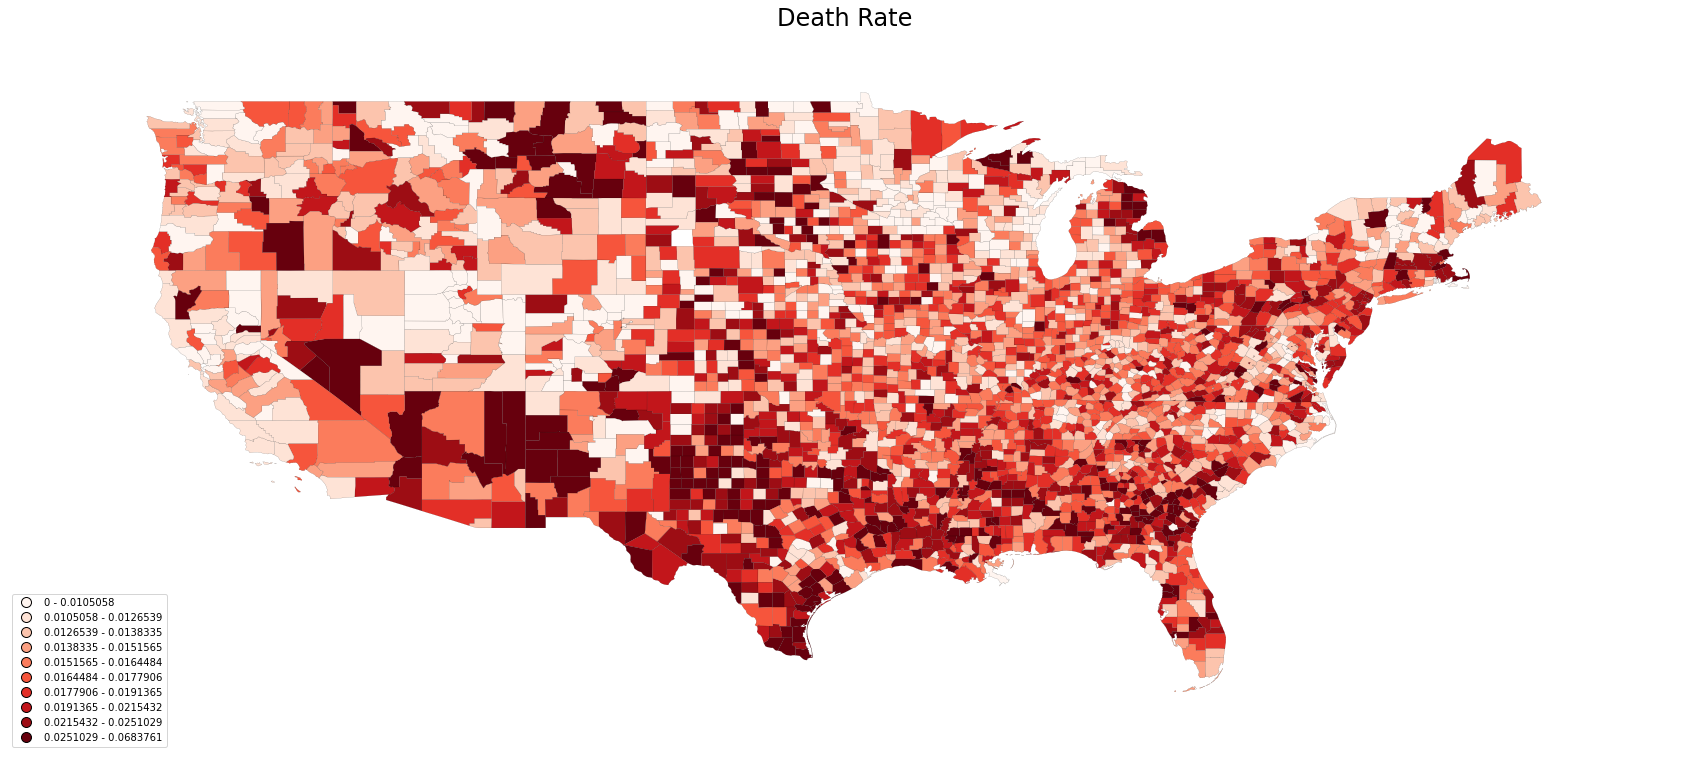

In [100]:
# https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
# link above to instructions on filling na values and displaying as greyed out


fig, ax = plt.subplots(1, 1, figsize=(30, 20))
ax.axis('off')

# Set up the color sheme:
scheme = mc.Quantiles(county_geo_covid_current['death_rate'], k=10)

# Map
gplt.choropleth(county_geo_covid_current, 
    hue="death_rate", 
    linewidth=.1,
    scheme=scheme,
    cmap='Reds',
    legend=True,
    edgecolor='black',
    ax=ax,
    
);

ax.set_title('Death Rate', fontsize=24);


KeyboardInterrupt: 

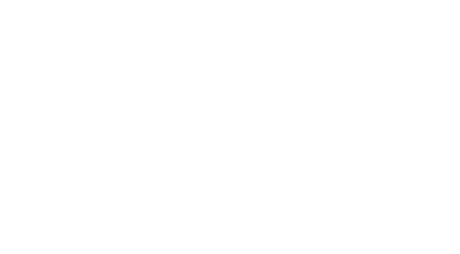

In [32]:
ax = gplt.kdeplot(
    county_geo_covid_current.head(1000), clip=county_geo_covid_current.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(geoData, ax=ax, zorder=1)
